In [29]:
import numpy as np
import pandas as pd

np.random.seed(42)

num_samples = 200

excess_heat_source_type = np.random.randint(1, 5, num_samples)
excess_heat_temperature_level = np.random.uniform(50, 600, num_samples)
excess_heat_availability = np.random.uniform(0.1, 1, num_samples)
excess_heat_demand_type = np.random.randint(1, 6, num_samples)
excess_heat_demand_location = np.random.uniform(0, 10, num_samples)
excess_heat_utilization_option = np.random.randint(1, 5, num_samples)
excess_heat_market_potential = np.random.uniform(100, 10000, num_samples)
excess_heat_environmental_impact = np.random.uniform(-1000, 0, num_samples)
excess_heat_stakeholder_involvement = np.random.randint(1, 4, num_samples)

label = []
for i in range(num_samples):
    if excess_heat_temperature_level[i] > 300 and excess_heat_availability[i] > 0.5:
        label.append(1)
    elif excess_heat_demand_type[i] == 4 and excess_heat_demand_location[i] < 5:
        label.append(1)
    else:
        label.append(0)

data = pd.DataFrame({
    'excess_heat_source_type': excess_heat_source_type,
    'excess_heat_temperature_level': excess_heat_temperature_level,
    'excess_heat_availability': excess_heat_availability,
    'excess_heat_demand_type': excess_heat_demand_type,
    'excess_heat_demand_location': excess_heat_demand_location,
    'excess_heat_utilization_option': excess_heat_utilization_option,
    'excess_heat_market_potential': excess_heat_market_potential,
    'excess_heat_environmental_impact': excess_heat_environmental_impact,
    'excess_heat_stakeholder_involvement': excess_heat_stakeholder_involvement,
    'label': label
})

data.to_csv('train_data.csv', index=False)


In [3]:
X_train

array([[-0.39063653,  0.82850281,  0.22867968, ...,  0.10986602,
        -0.27110045,  0.18344658],
       [-1.25664725, -0.36252211, -0.45388832, ..., -1.34956213,
         0.54615905,  0.1685134 ],
       [-0.11079148, -1.93437697, -0.61409319, ..., -3.67162751,
         1.52928411, -0.29148942],
       ...,
       [-0.25023617,  2.88623713, -0.77184192, ...,  4.2607739 ,
        -0.31055758, -0.31779021],
       [-0.71347432,  0.19877182, -1.07106178, ..., -0.50033647,
         1.2282427 , -1.50661283],
       [-0.41149124, -0.41654808, -3.27135515, ...,  2.91612532,
        -0.25834875,  0.5414441 ]])

In [33]:
from sklearn import tree 
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train_data.csv')
X = data.drop('label', axis=1) # features 
y = data['label'] # labels

clf = DecisionTreeClassifier(random_state=42, max_depth=10)
clf.fit(X, y)
importances = clf.feature_importances_
for feature_name, importance in zip(X.columns, importances):
    print(f"{feature_name}: {importance}")

fig, ax = plt.subplots(figsize=(150, 80))
tree.plot_tree(clf, feature_names=X.columns, class_names=['suitable', 'unsuitable'], ax=ax, fontsize=80)
fig.savefig('decision_tree_plot.pdf', bbox_inches='tight')

excess_heat_source_type: 0.0
excess_heat_temperature_level: 0.3516683632796018
excess_heat_availability: 0.48099695851615487
excess_heat_demand_type: 0.06650756650756645
excess_heat_demand_location: 0.059185606060606064
excess_heat_utilization_option: 0.0
excess_heat_market_potential: 0.027173913043478246
excess_heat_environmental_impact: 0.014467592592592593
excess_heat_stakeholder_involvement: 0.0


In [9]:
plt.savefig('decision_tree.pdf')

<Figure size 640x480 with 0 Axes>

In [16]:
import numpy as np
import pandas as pd

# Number of samples for each class
n_samples = 100

# Generate synthetic data for the six use cases (label 1)
data_1 = np.random.rand(n_samples, 9)
data_1[:, 0] = np.random.randint(1, 5, n_samples)  # excess heat source type
data_1[:, 1] = np.random.uniform(50, 600, n_samples)  # excess heat temperature level
data_1[:, 2] = np.random.uniform(0.1, 1, n_samples)  # excess heat availability
data_1[:, 3] = np.random.randint(1, 5, n_samples)  # excess heat demand type
data_1[:, 4] = np.random.uniform(0, 10, n_samples)  # excess heat demand location
data_1[:, 5] = np.random.randint(1, 5, n_samples)  # excess heat utilization option
data_1[:, 6] = np.random.uniform(1000, 10000, n_samples)  # excess heat market potential
data_1[:, 7] = np.random.uniform(-1000, 0, n_samples)  # excess heat environmental impact
data_1[:, 8] = np.random.randint(1, 5, n_samples)  # excess heat stakeholder involvement
labels_1 = np.ones(n_samples)

# Generate synthetic data for other cases not similar to the six use cases (label 0)
data_0 = np.random.rand(n_samples, 9)
data_0[:, 0] = np.random.randint(5, 10, n_samples)  # excess heat source type
data_0[:, 1] = np.random.uniform(10, 50, n_samples)  # excess heat temperature level
data_0[:, 2] = np.random.uniform(0, 0.1, n_samples)  # excess heat availability
data_0[:, 3] = np.random.randint(5, 10, n_samples)  # excess heat demand type
data_0[:, 4] = np.random.uniform(10, 100, n_samples)  # excess heat demand location
data_0[:, 5] = np.random.randint(5, 10, n_samples)  # excess heat utilization option
data_0[:, 6] = np.random.uniform(0, 1000, n_samples)  # excess heat market potential
data_0[:, 7] = np.random.uniform(0, 1000, n_samples)  # excess heat environmental impact
data_0[:, 8] = np.random.randint(5, 10, n_samples)  # excess heat stakeholder involvement
labels_0 = np.zeros(n_samples)

# Combine the data and labels
data = np.vstack((data_1, data_0))
labels = np.hstack((labels_1, labels_0))

# Save the data and labels to a CSV file
df = pd.DataFrame(data, columns=['excess_heat_source_type', 'excess_heat_temperature_level', 'excess_heat_availability',
                                 'excess_heat_demand_type', 'excess_heat_demand_location', 'excess_heat_utilization_option',
                                 'excess_heat_market_potential', 'excess_heat_environmental_impact', 'excess_heat_stakeholder_involvement'])
df['label'] = labels
df.to_csv('train_data.csv', index=False)


In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from PIL import Image

# Load the dataset
data = pd.read_csv("train_data.csv")
X = data.drop("label", axis=1)
y = data["label"]

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision tree
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['unsuitable', 'suitable'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the decision tree as a PNG file
graph.write_png("decision_tree.png")

# Convert the PNG file to a PDF file
image = Image.open("decision_tree.png")
image.save("decision_tree.pdf", "PDF", resolution=100.0)


InvocationException: GraphViz's executables not found

\begin{algorithm}[H]
\SetAlgoLined
\KwResult{Decision tree model}
 Initialize data: Load the data\;
 Preprocess data: Convert categorical data to numerical data, handle missing values\;
 Split data: Separate data into training set and test set\;
 Initialize decision tree classifier\;
 Train the classifier with training data\;
 Evaluate the classifier with test data\;
 \caption{Decision Tree for EMB3Rs Suitability}
\end{algorithm}


Accuracy: 0.5


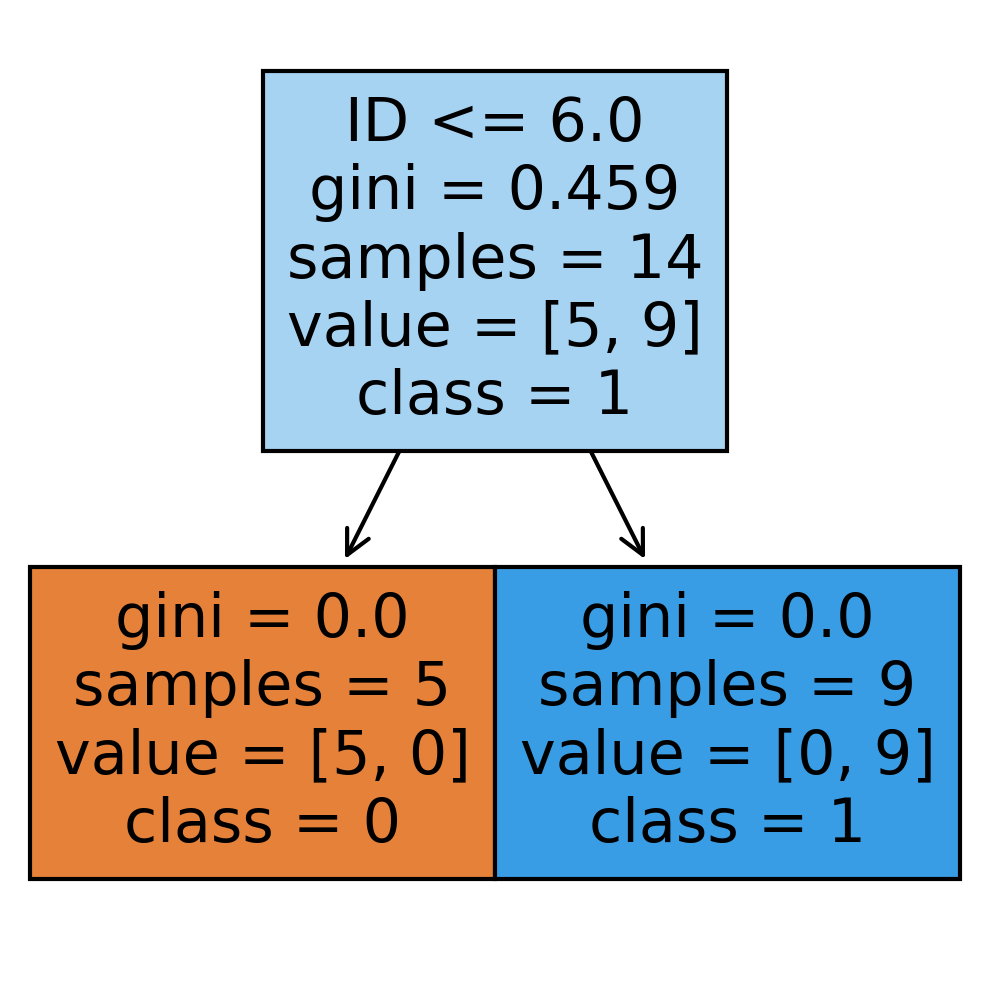

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data.csv', sep='|')

# Preprocess data: fill missing values and convert categorical data to numerical data
data = data.fillna(method='ffill')
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = data[column].astype('category').cat.codes

# Split data into training set and test set
features = data.drop('Suitability', axis=1)
labels = data['Suitability']
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the classifier with training data
clf.fit(features_train, labels_train)

# Predict the test data
labels_pred = clf.predict(features_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(labels_test, labels_pred))

# Plot the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = features.columns, 
               class_names=['0','1'],
               filled = True);
fig.savefig('decision_tree.png')


In [6]:
data

,ID,Excess heat source type,Excess heat temperature level,Excess heat availability,Excess heat demand type,Excess heat demand location,Excess heat utilization option,Excess heat market potential,Excess heat environmental impact,Excess heat stakeholder involvement,Suitability
0,0,1,2,5.0,2,0.0,1,1.0,1.0,3,1
1,6,1,2,2.0,3,2.0,4,1.0,1.0,3,1
2,7,1,3,2.0,4,4.0,4,1.0,1.0,3,1
3,8,1,3,2.0,3,0.0,2,3.0,2.0,1,1
4,9,1,3,2.0,4,0.0,2,3.0,2.0,1,1
5,10,1,3,2.0,4,0.0,2,2.0,3.0,1,1
6,11,1,2,6.0,2,3.0,4,1.0,1.0,2,1
7,16,1,6,2.0,1,0.0,3,1.0,1.0,1,1
8,17,1,3,2.0,1,0.0,3,1.0,1.0,1,1
9,14,1,1,6.0,2,0.0,1,1.0,1.0,1,1


In [7]:
features_train

,ID,Excess heat source type,Excess heat temperature level,Excess heat availability,Excess heat demand type,Excess heat demand location,Excess heat utilization option,Excess heat market potential,Excess heat environmental impact,Excess heat stakeholder involvement
3,8,1,3,2.0,3,0.0,2,3.0,2.0,1
13,1,1,1,1.0,1,4.0,1,1.0,1.0,2
16,4,1,1,2.0,2,4.0,1,1.0,2.0,2
15,3,1,2,6.0,2,3.0,3,2.0,3.0,3
11,13,1,2,6.0,2,2.0,4,1.0,1.0,3
2,7,1,3,2.0,4,4.0,4,1.0,1.0,3
9,14,1,1,6.0,2,0.0,1,1.0,1.0,1
17,5,1,3,5.0,3,1.0,4,2.0,6.0,3
4,9,1,3,2.0,4,0.0,2,3.0,2.0,1
12,15,1,2,6.0,2,2.0,4,1.0,1.0,3


In [8]:
features_test

,ID,Excess heat source type,Excess heat temperature level,Excess heat availability,Excess heat demand type,Excess heat demand location,Excess heat utilization option,Excess heat market potential,Excess heat environmental impact,Excess heat stakeholder involvement
0,0,1,2,5.0,2,0.0,1,1.0,1.0,3
1,6,1,2,2.0,3,2.0,4,1.0,1.0,3
8,17,1,3,2.0,1,0.0,3,1.0,1.0,1
5,10,1,3,2.0,4,0.0,2,2.0,3.0,1


In [9]:
labels_train

3     1
13    0
16    0
15    0
11    1
2     1
9     1
17    0
4     1
12    1
7     1
10    1
14    0
6     1
Name: Suitability, dtype: int64

In [10]:
labels_test

0    1
1    1
8    1
5    1
Name: Suitability, dtype: int64